<a href="https://colab.research.google.com/github/artemiichirkov2/mgmt467-analytics-portfolio/blob/main/Labs/Week5_DataViz_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**

Exploratory visualization is what you make while you’re still figuring things out—quick, rough charts to spot patterns or problems for yourself. Explanatory visualization is what you show others—clean, focused charts that highlight one clear message with labels or notes. In short: explore to learn, explain to tell.

---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

📝 **Your response (template):**
1. **Bar:**  
   - Question archetype: Which categories are bigger/smaller? Compare parts across discrete groups.
   - Data shape: Categorical → numeric (counts, sums, averages).
   - Pitfalls: Too many categories; unsorted bars; truncated axes; 3D effects; using bars for medians without variability shown.
   - Alternatives: Lollipop, dot plot, Cleveland dot chart, stacked/100% stacked bar (for composition), small multiples.
2. **Line:**  
   - Question archetype: How does something change over time? Trends, seasonality, breakpoints.
   - Data shape: Time series (timestamp → numeric).
   - Pitfalls: Uneven time gaps plotted as equal; overplotting many series; y-axis not starting at zero can mislead trends; smoothing that hides spikes.
   - Alternatives: Area chart (cumulative), step chart (discrete changes), small-multiple lines, heatmap calendar.
3. **Scatter:**  
   - Question archetype: Are two variables related? Patterns, clusters, outliers, correlation.
   - Data shape: Numeric ↔ numeric (optionally color/size for extra variables).
   - Pitfalls: Overplotting (especially with big data); confusing correlation with causation; size/alpha misuse; axes on wildly different scales.
   - Alternatives: Hexbin/density plot, bubble chart (with care), pair plot, regression line with confidence band.
4. **Histogram:**  
   - Question archetype: What’s the distribution? Center, spread, skew, multimodality.
   - Data shape: Single numeric variable.
   - Pitfalls: Bad bin width hiding or inventing structure; comparing groups in one histogram; unequal bin sizes; using counts when rates are needed.
   - Alternatives: Density plot (KDE), boxplot/violin (for comparisons), rug plot, cumulative distribution (ECDF).
5. **Map:**  
   - Question archetype: Where is it happening? Spatial patterns, hotspots, regional differences.
   - Data shape: Geocoded points or areas (lat/long or polygons) + metric.
   - Pitfalls: Choropleth with raw counts (use rates); area bias (big regions dominate); inappropriate color scales; projecting tiny differences as big.
   - Alternatives: Proportional symbol map, dot-density map, heatmap, small-multiple maps, cartogram.

---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**
1. KPI On-Time Arrival Rate (%):  
   - Why it matters: Core reliability metric that impacts customer satisfaction, crew/aircraft utilization, and cost.  
   - Best chart: Line over time with a target band; optional heatmap (hour-of-day × weekday) for patterns.
   - Drill-down fields: Origin, destination, route (O-D), hub/spoke, aircraft type, time of day, weather, delay cause.
2. KPI Average Arrival Delay (minutes):  
   - Why it matters: Quantifies operational friction and drives knock-on costs and missed connections.
   - Best chart: Stacked bar by delay cause (carrier, ATC, weather, late inbound) per month.
   - Drill-down fields: Station, route, aircraft/TAIL, crew base, season, carrier/partner, runway configuration, schedule block time.
3. KPI Cancellation Rate (%):  
   - Why it matters: Directly affects completion factor, customer trust, and revenue leakage.  
   - Best chart: Line over time with event markers; small multiples by hub.
   - Drill-down fields: Origin, destination, route, aircraft type, maintenance vs. weather flag, day of week, time of day.
4. KPI Load Factor (%):  
   - Why it matters: Seats filled vs. seats offered—key for revenue efficiency and capacity planning.
   - Best chart: Dot/lollipop by route for latest month, plus trend line over time.
   - Drill-down fields: Route, cabin (Y/Premium/Business), fare class/bucket, channel (direct/OTA), competitor presence, aircraft config.
5. KPI Unit Margin (RASM − CASM):  
   - Why it matters: Per-mile profitability after costs—fast read on whether flying a seat creates value.
   - Best chart: Dual-axis line for RASM and CASM with shaded margin; or waterfall showing drivers MoM.
   - Drill-down fields: Route, cabin, aircraft type, stage length, fuel price, ancillary mix, loyalty tier mix, partnership/codeshare.


---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


/tmp/ipython-input-2856614081.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=on_time_rate.index, y=on_time_rate.values, ax=ax, palette='viridis')


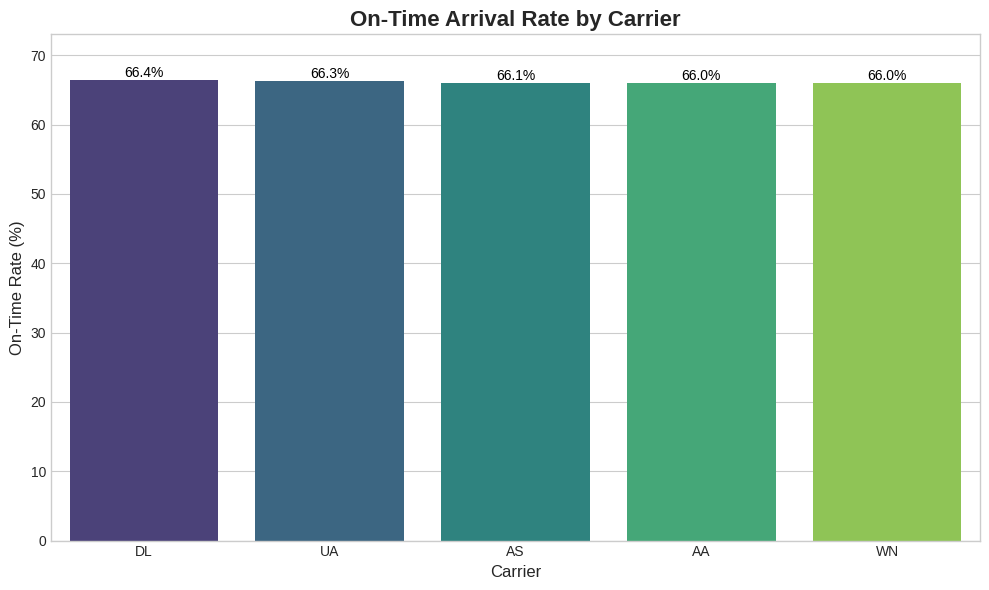

In [ ]:
# Prompt A — On-Time Rate by Carrier (Bar Chart)
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean and modern plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Compute on-time rate, convert to percentage, and sort
on_time_rate = df_flights.groupby('carrier')['on_time'].mean().mul(100).sort_values(ascending=False)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=on_time_rate.index, y=on_time_rate.values, ax=ax, palette='viridis')

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10, color='black')

# Customize labels and title for clarity
ax.set_title('On-Time Arrival Rate by Carrier', fontsize=16, weight='bold')
ax.set_xlabel('Carrier', fontsize=12)
ax.set_ylabel('On-Time Rate (%)', fontsize=12)
ax.set_ylim(0, max(on_time_rate.values) * 1.1)  # Give some space at the top

# Ensure the layout is clean and tight
plt.tight_layout()
plt.show()

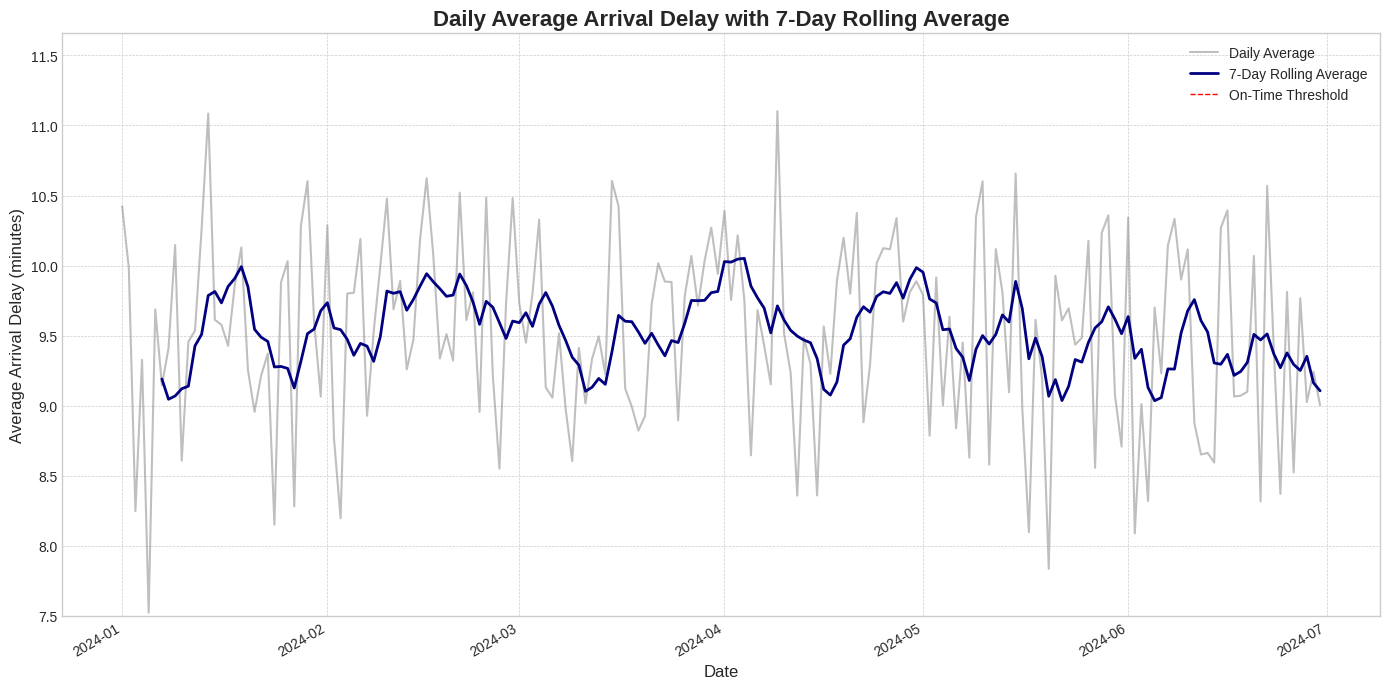

In [ ]:
# Prompt B — Average Arrival Delay over Time (Line Chart)
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate to get daily average arrival delay
daily_delay = df_flights.groupby('date')['arr_delay_min'].mean().reset_index()

# Calculate the 7-day rolling average
daily_delay['rolling_avg_7d'] = daily_delay['arr_delay_min'].rolling(window=7).mean()

# Create the plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Plot daily average (with some transparency)
sns.lineplot(x='date', y='arr_delay_min', data=daily_delay, ax=ax, alpha=0.5, label='Daily Average', color='gray')

# Plot the rolling average overlay
sns.lineplot(x='date', y='rolling_avg_7d', data=daily_delay, ax=ax, linewidth=2, label='7-Day Rolling Average', color='navy')

# Add a horizontal line at y=0 for reference (will not be visible with new y-axis limits)
ax.axhline(0, color='red', linestyle='--', linewidth=1, label='On-Time Threshold')

# Customize labels, title, and legend
ax.set_title('Daily Average Arrival Delay with 7-Day Rolling Average', fontsize=16, weight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Average Arrival Delay (minutes)', fontsize=12)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the y-axis to start from 7.5
ax.set_ylim(bottom=7.5)

# Improve date formatting on the x-axis
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

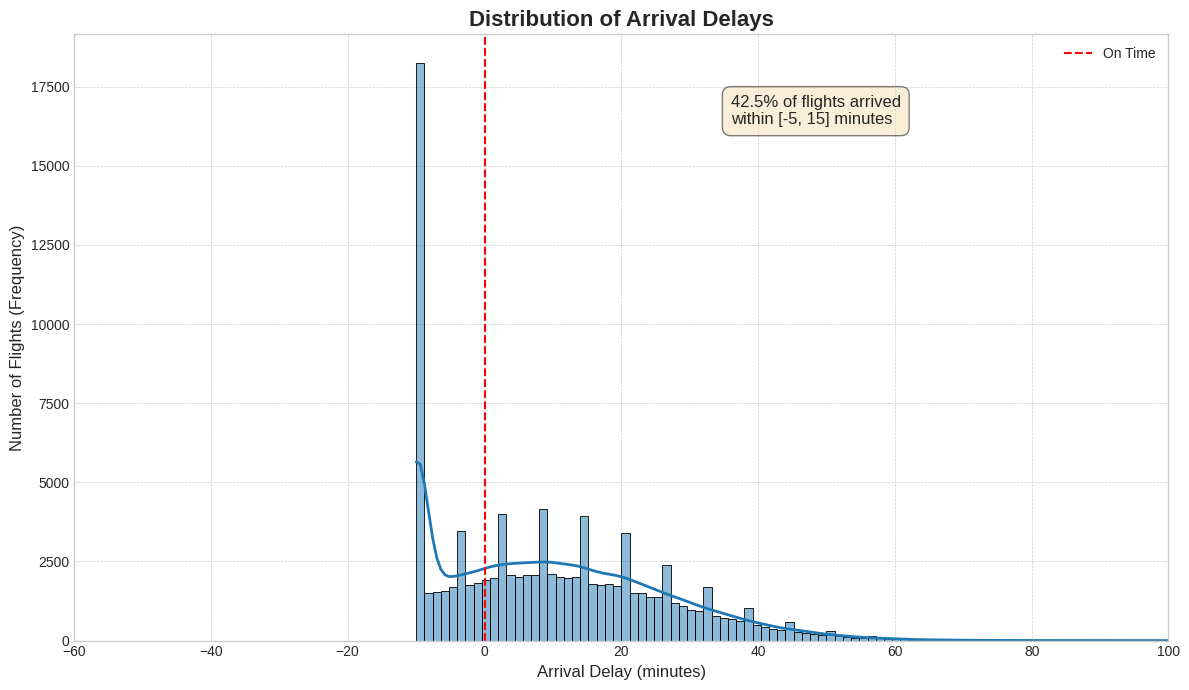

In [ ]:
# Prompt C — Delay Distribution (Histogram)
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of flights within the [-5, 15] minute window
flights_in_window = df_flights['arr_delay_min'].between(-5, 15).mean() * 100

# Create the plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the histogram
sns.histplot(df_flights['arr_delay_min'], bins=100, kde=True, ax=ax, line_kws={'linewidth': 2, 'color': 'navy'})

# Add a vertical reference line at x=0
ax.axvline(0, color='red', linestyle='--', linewidth=1.5, label='On Time')

# Add the annotation text
annotation_text = f'{flights_in_window:.1f}% of flights arrived\nwithin [-5, 15] minutes'
ax.text(0.6, 0.9, annotation_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# Customize labels and title
ax.set_title('Distribution of Arrival Delays', fontsize=16, weight='bold')
ax.set_xlabel('Arrival Delay (minutes)', fontsize=12)
ax.set_ylabel('Number of Flights (Frequency)', fontsize=12)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Limit x-axis for better readability of the main distribution
ax.set_xlim(-60, 100)

plt.tight_layout()
plt.show()

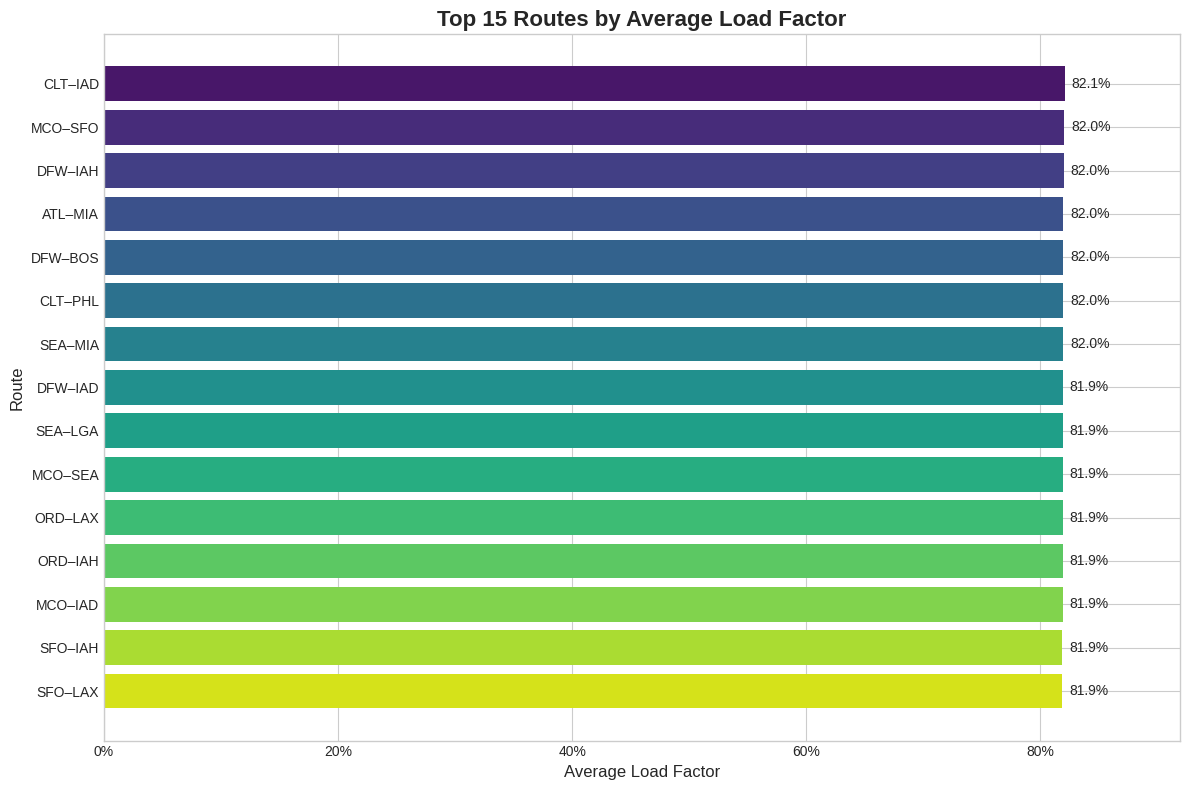

In [ ]:
# Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 'route' column for easier grouping if it doesn't exist
if 'route' not in df_flights.columns:
    df_flights['route'] = df_flights['origin'] + '–' + df_flights['dest']

# Compute mean load factor, get top 15, and sort for plotting (highest on top)
top_routes_lf = df_flights.groupby('route')['load_factor'].mean().nlargest(15).sort_values(ascending=True)

# Create the plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Create horizontal bars
bars = ax.barh(top_routes_lf.index, top_routes_lf.values, color=sns.color_palette('viridis_r', n_colors=len(top_routes_lf)))

# Add percentage labels to the end of each bar
ax.bar_label(bars, fmt='{:.1%}', padding=5, fontsize=10)

# Customize labels and title
ax.set_title('Top 15 Routes by Average Load Factor', fontsize=16, weight='bold')
ax.set_xlabel('Average Load Factor', fontsize=12)
ax.set_ylabel('Route', fontsize=12)

# Adjust x-axis limits and format to give space for labels
ax.set_xlim(right=top_routes_lf.max() * 1.12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.tight_layout()
plt.show()

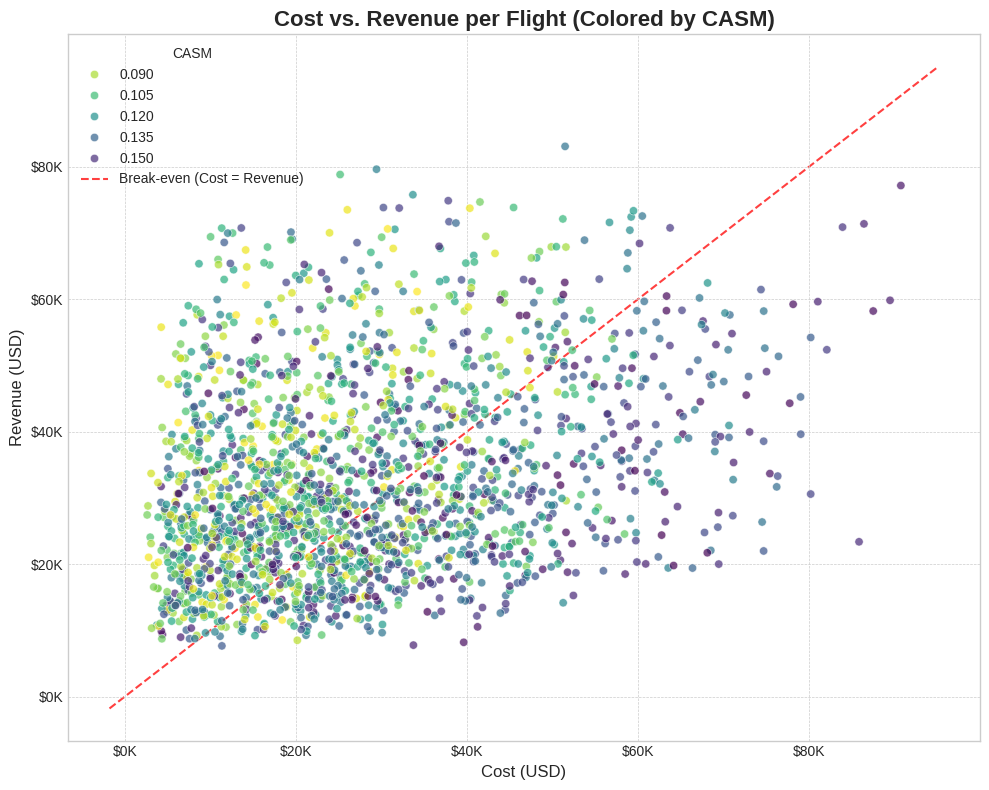

In [ ]:
# Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use a sample to avoid overplotting and for faster rendering
df_sample = df_flights.sample(n=2000, random_state=42)

# Create the plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

# Create the scatter plot
scatter = sns.scatterplot(
    data=df_sample,
    x='cost_usd',
    y='revenue_usd',
    hue='casm',
    palette='viridis_r', # Reversed viridis: high CASM is yellow (bad)
    alpha=0.7,
    ax=ax
)

# Add a diagonal y=x reference line (break-even point)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Break-even (Cost = Revenue)')

# Customize labels, title, and legend
ax.set_title('Cost vs. Revenue per Flight (Colored by CASM)', fontsize=16, weight='bold')
ax.set_xlabel('Cost (USD)', fontsize=12)
ax.set_ylabel('Revenue (USD)', fontsize=12)
ax.legend(title='CASM')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve formatting for currency
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)


#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


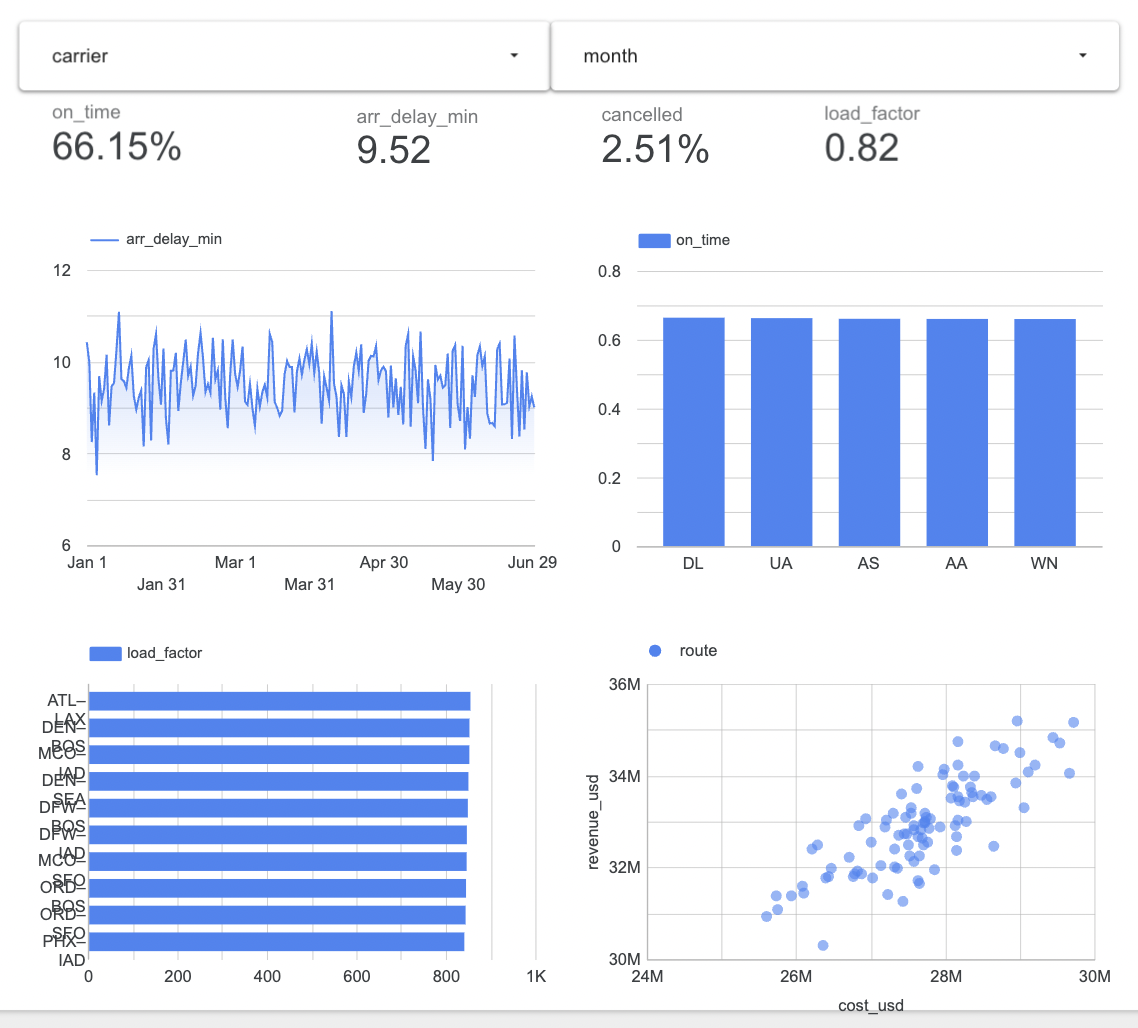### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
The single change that most improved clarity was standardizing the visual hierarchy—putting the KPI cards at the top with large, consistent typography and moving detailed charts below, which made the “scan > explore” flow obvious. I also removed non-essential gridlines/legends and used a single color per metric across views, so users no longer have to re-decode colors between charts. Sorting bars by value and adding brief in-chart annotations further reduced eye travel and tooltip hunting. Next, I’d add a global date filter and lightweight small multiples for segments to compare patterns side-by-side without toggling.

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  
